<a href="https://colab.research.google.com/github/andersknudby/Remote-Sensing/blob/master/Chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 5 - Reading and writing files
One of the most fundamental things you need to be able to do when programming is to read and write files. In remote sensing, the images you work with are stored in files, as is their metadata. And once you have done what you needed to do with the imagery, writing the results to a file is almost always how you want to save the results for later use. These notebooks will teach you to read and write three different kinds of files – text files, image files (raster data), and shape files (vector data). We will cover text files in this chapter, image files in the following chapter, and shapefiles after that.

Because we will be working with files, we need to set up Colab so it can access some files from a location that you also have access to. This is easy when you're writing Python code on your own computer, but a bit trickier with Colab because your code exists on a Google server somewhere. To make it work we're going to give Colab access to files on our Google Drive (if you're worried about privacy this may sound ominous to you, but remember the Google already has access to all the files on your Google Drive - these files will be no different).

To give Colab basic access to your Google Drive, we need to run a few lines of code, as shown below. When you do this the first time a link will pop up, which will take you to your Google Drive login page, which will bring you to an authentication code, which you will copy (using the little icon on that page) and paste (using Ctrl+V) into the field that also pops up below. When you do this again later you will not need to go through the same steps again. Give it a try now:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

I have put all the files I need to this course in a folder called 'Python files'. To make it easier to follow the rest of the examples I suggest you do the same, and make sure to remember that filenames are also case sensitive, so the 'P' in Python has to be uppercase. To make that easy to access in the rest of my code, I write a sort of shortcut to it like this:

In [ ]:
myDir = '/content/drive/My Drive/Python files/'

One of the files in that folder is called 'sfu.tif'. To test whether I have done everything correctly, I check whether Python believes this file to exist, using the 'os.path.exists' function. This will obviously only work for you if you in fact have a folder in your Google Drive called 'Python files', and if there is a file called 'sfu.tif' in that folder!

In [ ]:
import os
if os.path.exists(myDir + 'sfu.tif'):
  print("Drive mounted and directory found")
else:
  print("No access to the files")

You will need to repeat the above process when you start a new Colab session.

Working with files requires you to create a 'file' object, which is a special kind of object Python uses to read and write to files. You create this object with the 'open()' function, like so:

In [ ]:
file = open(myDir + "blabla.txt", "r")

If you run the code block above it will produce an error. Read through the error message and you'll see it says 'FileNotFoundError'... which is because there is no file called 'blabla.txt' in myDir.

Nonetheless, In the line of code above, ‘file’ is the name of the new file object, ‘open’ is Python’s ‘open’ function, ‘blabla.txt’ is the name of the file, and ‘r’ defines the purpose the file is opened for. Files can be opened for reading only (which helps you ensure that you don’t accidentally change the contents of the file), writing (which first delete contents of the file, and then replaces it with what you write to it), appending (writing without first deleting the existing contents), and combinations of the above.

##Writing to a text file
To practice a bit, the first thing we will do is create a file and write something to it. I personally prefer doing file creation in two steps, first defining the file name, then using it to create the file. Step 1, create the file name, and check that it worked alright:

In [ ]:
fileName = myDir + "blabla.txt"
print(fileName)

Step 2, open the file to writing, write something to it, and then close it again (closing it is important!):

In [ ]:
f = open(fileName, "w")
f.write("This is just a test")
f.close()

Note that, because we're working in Colab, the file called 'blabla.txt' is not yet visible in your Google Drive. To make that happen you need to execute a special command that takes all the stuff you've done in your code and writes it to Google Drive:

In [ ]:
drive.flush_and_unmount()

Now you should be able to go to your Google Drive and open a file called 'blabla.txt' to see what it says inside.

**Important:** Note that when used with "w", the function 'open' will try to open a file that exists, but if no such file exists it will create an empty file to write to. If a file already exists, opening it with "w" will overwrite the existing contents, so use this with care!

One thing to keep in mind when writing more than a single line to a file is that when  file has been opened for writing, the file object has the equivalent of a ‘cursor’ – information that determines where in the file the next thing to write is going to be written. There is a function in Python that will let you know where the ‘cursor’ is at a given time, and other functions to move the cursor around without writing anything. You can see some basic information on those on \[[TutorialsPoint](https://www.tutorialspoint.com/python/python_files_io.htm)].

Before we move on this more code, because we used the 'drive.flust_and_unmount() function, the first thing we need to do is 'mount' our Google Drive again:

In [ ]:
drive.mount('/content/drive')

##Reading from a text file
Reading from files works pretty much the same as writing to them – you open the file (with "r" this time), you read text from the file, and you close it again at the end. Now that we have a file, we can try to read its content into a string variable. The first two lines should look like this:

In [ ]:
fileName = myDir + "blabla.txt"
f = open(fileName, "r")

Now the file is open and ready to be read. When you just open a file, the 'cursor' is always set at the beginning of the file. To read something, you have to specify what you want to read. Python has a 'read()' function that reads a specific number of characters:

In [ ]:
text = f.read(10)
print(text)

It is typically more useful to read an entire line at a time. We can do this with the readline() function, which reads the rest of the line from where 'cursor' is located. Remember, when you just open a file, the 'cursor' is located at the beginning of the file. However, once you have used readline() once, the cursor will be placed at the beginning of line two (assuming there are two or more lines in the file!), so if you use readline() repeatedly you will read one line after the other in the right sequence. Let's try it:

In [ ]:
text = f.readline()
print(text)

What happened here? Well, you had already read the first 10 characters of the file, namely 'This is ju' (remember that spaces count as characters too). Then you used the readline(), which read *the rest of the line*.

This can get confusing pretty quickly. One way to reset the cursor position is with the f.seek() function, like what is shown below, but the easiest approach to reading text files typically is to just read them line by line using the readline() function.

In [ ]:
f.seek(0,0)
text = f.readline()
print(text)
f.close()

Let’s create a longer file, so we can practice reading text files with multiple lines in them. Write and execute the following code:

In [ ]:
fileName = myDir + "blabla.txt"
f = open(fileName, "w")
f.write ("I know how to create and write to files in Python!" + "\n")
f.write ("The '\\n' character is a code means 'new line'" + "\n")
f.write ("You can add it to the end of a line, like pressing 'Enter'\n")
f.write ("You can add it the way we did in the first line, or the way we did in the previous line")
f.write ("If you want to actually write a 'backslash' followed by an 'n', you need to write an additional 'backslash' before the code\n")
f.write ("Finally, you can include quotes inside quotes by shifting between single and double quotes, as done above")
f.close()

If you want to read this file line by line, there is a nice structure available for doing so. Try this to see how it works:

In [ ]:
fileName = myDir + "blabla.txt"
f = open(fileName, "r")
for line in f:
  print(line)

The above structure can be useful if you are searching through a file to find a specific piece of text. For example, Landsat metadata files are text files that contain one piece of information on each line. Say we want to find out what the sun elevation (the angle between the horizon and the direction toward the sun) was when a given image was acquired, this information is provided on a single line as SUN_ELEVATION = xxx.xxx. See the image below, which contains part of a Landsat 8 metadata file (you have to search through all the information to find the part about the sun elevation).

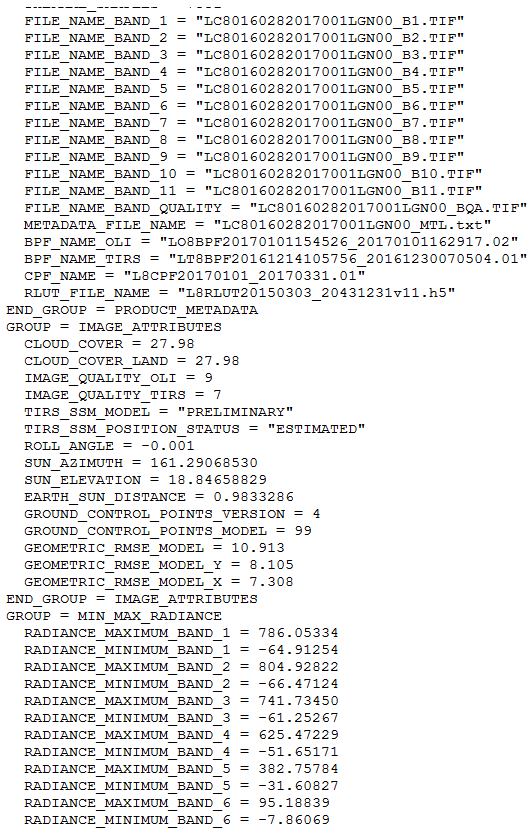

To find and read this value from the file, we can cycle through all the lines until we find one that starts with “SUN_ELEVATION”, read that line, and use some string manipulation functions to read the number located to the right of the equal sign. The file shown above is found in the Python files folder, and we can read all of it like this:

In [ ]:
fileName = myDir + "LC80160282017001LGN00_MTL.txt"
f = open(fileName, "r")
for line in f:
  print(line, end="")

That's a lot of information! If we only want to know what the sun elevation was when this Landsat image was acquired, in other words how far above the horizon hte sun was, as seen by a person standing at the centre of the image while it was acquired, we don't need all this information. We just need the line that starts with "SUN_ELEVATION".

As you'll notice, all the lines in the file have the same structure: XXX = YYY. So we need to find the line where XXX is SUN_ELEVATION. To do that, we can use a function that takes a string and splits it into components as defined by a separator. If we use space as a separator there are three components in each line, namely 'XXX', '=', and 'YYY'. So we'll split each line, and check if the first component, namely 'XXX' is equal to 'SUN_ELEVATION'. This is done with the split() function. In our case we only want to first compoment, and split returns all components, so we will pick the first one by adding [0] at the end.

In [ ]:
fileName = myDir + "LC80160282017001LGN00_MTL.txt"
f = open(fileName, "r")
for line in f:
  XXX = line.split()[0]
  print(XXX)

Pretty good! Now we need to test whether each instance of XXX is equal to SUN_ELEVATION. And if it is, we'll grab the last component from that split line, and save that as the sun elevation. And while we're at it we'll cut down on the print statements so the output isn't quite so overwhleming

In [ ]:
fileName = myDir + "LC80160282017001LGN00_MTL.txt"
f = open(fileName, "r")
for line in f:
  XXX = line.split()[0]
  if XXX == "SUN_ELEVATION":
    print("Found the right line!")
    sunElevation = line.split()[2]  # We use [2] here because we want the thrid component (remember, Python starts counting at 0)
print("Sun elevation is: " + sunElevation)


We have now found the value of sun elevation in the metadata file. The only remaining issue, say if we wanted to use this value in some calculations, is that the value is still a string type (that's why we could print it above without using the str() wrapper around it. You check this with 'type(sunElevation)' if you want. To change in to a float all we need to do is add float() to the line where we got it from the text file (and then use str() to print it!):

In [ ]:
fileName = myDir + "LC80160282017001LGN00_MTL.txt"
f = open(fileName, "r")
for line in f:
  XXX = line.split()[0]
  if XXX == "SUN_ELEVATION":
    print("Found the right line!")
    sunElevation = float(line.split()[2])  # We use [2] here because we want the thrid component (remember, Python starts counting at 0)
print("Sun elevation is: " + str(sunElevation))

Reading through a small text file is quick, but sometimes you may have very large files and want to get out of searching through each line when you haev found what you need. You can always get out of a for loop by using the command break(). In our example it would look like this:

In [ ]:
fileName = myDir + "LC80160282017001LGN00_MTL.txt"
f = open(fileName, "r")
for line in f:
  XXX = line.split()[0]
  if XXX == "SUN_ELEVATION":
    print("Found the right line!")
    sunElevation = float(line.split()[2])  # We use [2] here because we want the third component (remember, Python starts counting at 0)
    break
print("Sun elevation is: " + str(sunElevation))

##Exercise
Another line in the metadata file contains the solar azimuth – the compass heading of the sun as seen from the image centre at the time of image capture. In the metadata file the code for this is SUN_AZIMUTH. Expand on the code above to also find and read the solar azimuth, and store it in a separate variable. Be careful with the 'break' statement when you do this! Print both values when you have found them.

##Another exercise
Instead of printing the two values (solar elevation and solar azimuth), write them to a text file instead. Check the contents of the file when you find it on your Google Drive.

##Yet another exercise!
The solar zenith angle is more commonly used for calculations than the sun elevation. The solar zenith angle is the angle between zenith (straight up from a given point on the Earth’s surface) and the direction of the sun. It is easy to calculate as 90 degrees minus the sun elevation. Modify the code from the last exercise to write the solar zenith angle instead of the sun elevation. Note that calculations can only be performed on numbers (not on strings).